In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
##REad the dataset
df=pd.read_csv('weight-height.csv')

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


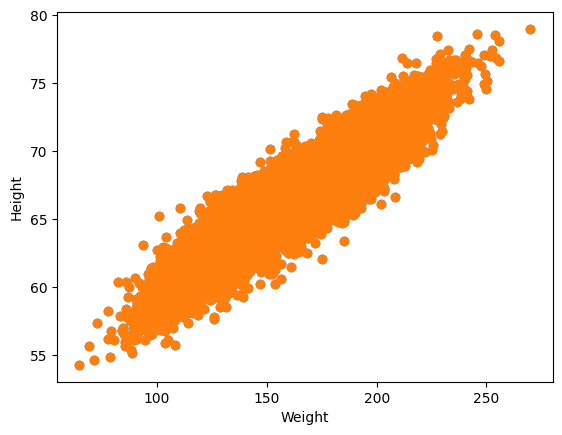

In [6]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [7]:
##divide our dataset into independent and dependent features
X=df['Weight']
y=df['Height']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [18]:
X_train

9254    120.681907
1561    209.373126
1670    200.877279
6087    134.342745
6669    160.201031
           ...    
5734    139.223151
5191     90.728561
5390    156.800504
860     179.386817
7270    150.380597
Name: Weight, Length: 8000, dtype: float64

In [17]:
X_test.shape

(2000,)

In [9]:
y_train

9254    61.391644
1561    74.697637
1670    68.507815
6087    65.797516
6669    67.161806
          ...    
5734    63.349988
5191    58.861625
5390    64.325406
860     69.074492
7270    67.588840
Name: Height, Length: 8000, dtype: float64

In [10]:
y_test

6252    68.687232
4684    68.829334
1731    66.398128
4742    71.929340
4521    67.042903
          ...    
6412    65.748601
8285    60.731857
7853    62.188933
1095    67.068304
6929    58.632720
Name: Height, Length: 2000, dtype: float64

In [14]:
X_train.dtype

dtype('float64')

In [20]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train.values.reshape(-1,1))
X_test=scaler.transform(X_test.values.reshape(-1,1))

In [24]:
X_train

array([[-1.26850469],
       [ 1.49950187],
       [ 1.23435095],
       ...,
       [-0.14126217],
       [ 0.56364485],
       [-0.34162408]], shape=(8000, 1))

In [25]:
X_test

array([[ 0.36793009],
       [ 1.05598138],
       [ 0.27747375],
       ...,
       [-1.1281409 ],
       [ 0.81914676],
       [-1.83691726]], shape=(2000, 1))

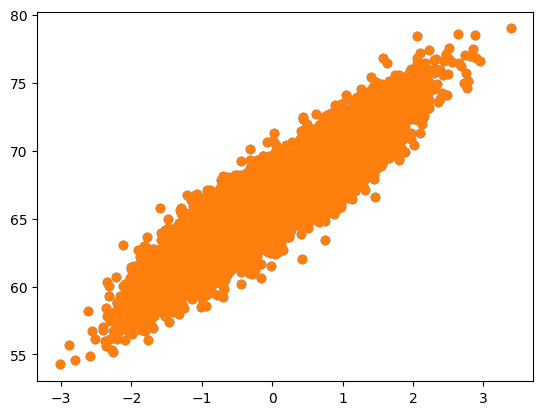

In [22]:
plt.scatter(X_train,y_train)
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression

In [26]:
regressor=LinearRegression()

In [27]:
regressor

LinearRegression()

In [28]:
type(X_train)

numpy.ndarray

In [ ]:
X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)


In [29]:
y_train.shape

(8000,)

In [30]:
regressor.fit(X_train,y_train)

LinearRegression()

In [31]:
## coefficient and intercepts
print("Coefficient : ",regressor.coef_)
print("Intercept : ",regressor.intercept_)

Coefficient :  [3.55479288]
Intercept :  66.3596814074891


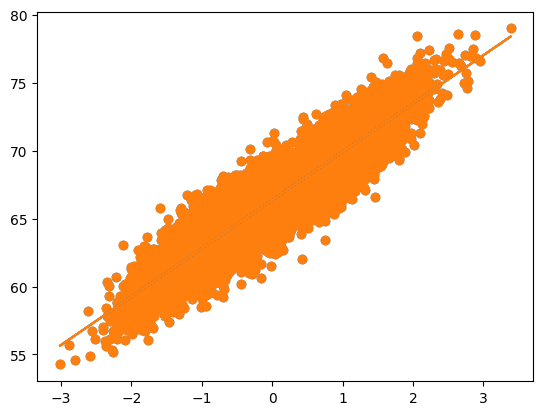

In [33]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train))
plt.show()

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =65.4364 + 1.26(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =65.4364 + 1.26(X_test)

So basically prediction is nothing but the point where slope  is calculated with respect to best fit line 

In [34]:
y_pred_test=regressor.predict(X_test)

In [35]:
y_test

6252    68.687232
4684    68.829334
1731    66.398128
4742    71.929340
4521    67.042903
          ...    
6412    65.748601
8285    60.731857
7853    62.188933
1095    67.068304
6929    58.632720
Name: Height, Length: 2000, dtype: float64

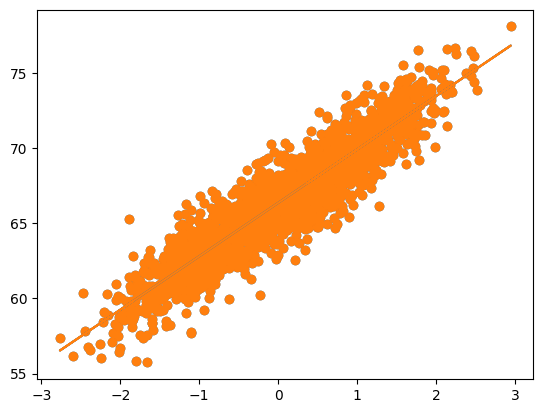

In [37]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test))
plt.show()

In [38]:
### Performance metrics

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [39]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

2.112361948474147
1.1588656330992098
1.4533966934303062


In [40]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)

In [41]:
print(score)

0.8578120230894554


## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [42]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
print(score)

0.8578120230894554


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [43]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8577408579358465

In [44]:
regressor.predict(scaler.transform([[75]]))

array([56.78231189])

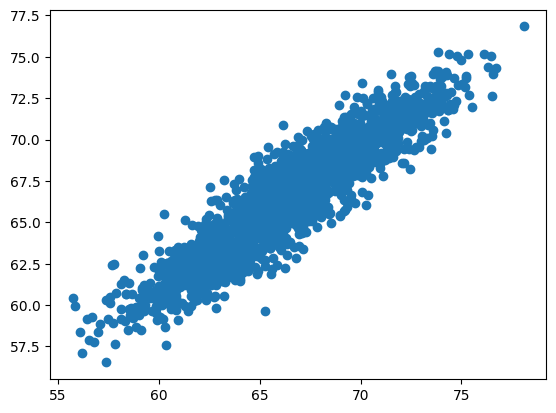

In [46]:
## Assumptions

## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)
plt.show()



In [47]:
## Residuals
residuals=y_test-y_pred_test

residuals



6252    1.019636
4684   -1.284143
1731   -0.947915
4742   -0.390533
4521   -1.690374
          ...   
6412    1.525611
8285   -1.039337
7853   -0.160441
1095   -2.203274
6929   -1.197101
Name: Height, Length: 2000, dtype: float64

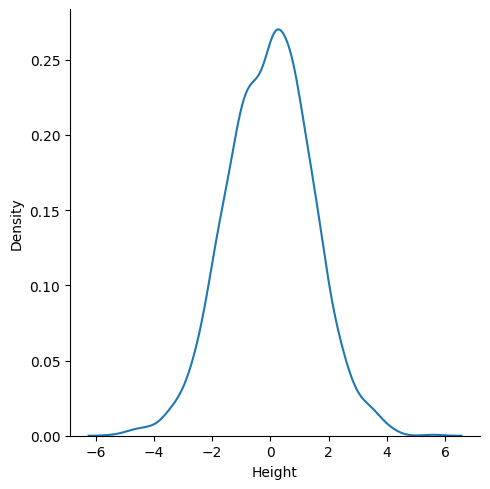

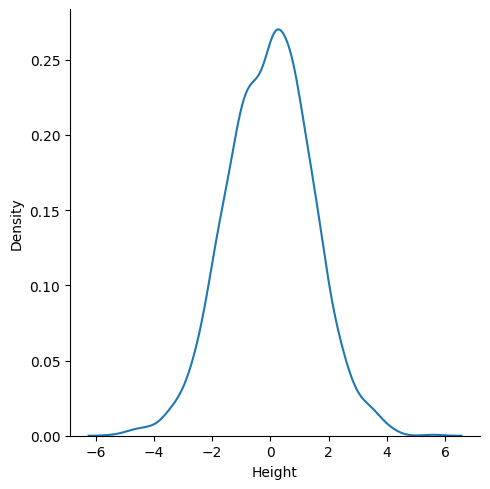

In [49]:
## Plot this residuals 
import seaborn as sns
sns.displot(residuals,kind="kde")
plt.show()



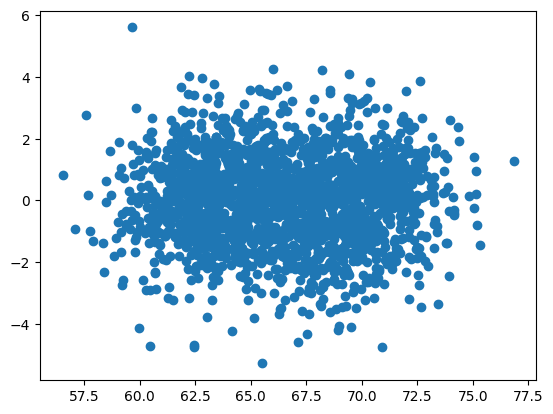

In [50]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residuals)
plt.show()

## Using OLS

In [53]:
import statsmodels.api as sm

In [54]:
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) 

In [55]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              22.94
Date:                Sat, 29 Mar 2025   Prob (F-statistic):                    1.70e-06
Time:                        22:43:03   Log-Likelihood:                         -44914.
No. Observations:                8000   AIC:                                  8.983e+04
Df Residuals:                    7999   BIC:                                  8.984e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [56]:
regressor.coef_

array([3.55479288])